사인함수를 3차 다항식의 계수를 이용해서 예측해보기
  - 모델정의 - 모델 순전파 - 오차계산 - 오차역전파(가중치 업데이트)
  - 반복(순전파 ~~ 오차역전파)
  - 학습종료

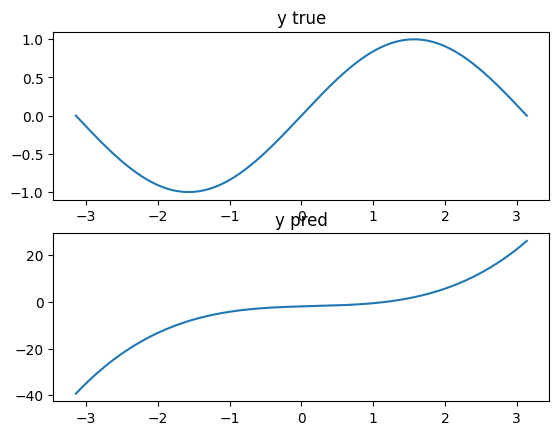

In [1]:
import math
import torch
import matplotlib.pyplot as plt

# -pi ~ pi 사이의 점을 1000개 추출
x = torch.linspace(-math.pi, math.pi, 1000)
# 실제 사인곡선으로 추출한 값을 y
y = torch.sin(x)

# 가중치 초기화  a b c d 계수   3차 다항식.
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 사인함수에 적용할 3차 다항식을 계산
y_random = a*x**3 + b*x**2 + c*x + d

# 실제 사인곡선으로
plt.subplot(2,1,1)
plt.title('y true')
plt.plot(x,y)

# 예측
plt.subplot(2,1,2)
plt.title('y pred')
plt.plot(x,y_random)

plt.show()



In [2]:
y_random[0],  y_random[0].item()

(tensor(-39.3200), -39.32003402709961)

가중치를 학습

epoch:1 loss:170071.84375
epoch:101 loss:1196.458984375
epoch:201 loss:1004.1723022460938
epoch:301 loss:845.3035888671875
epoch:401 loss:711.6854858398438
epoch:501 loss:599.304443359375
epoch:601 loss:504.7835693359375
epoch:701 loss:425.2843933105469
epoch:801 loss:358.41845703125
epoch:901 loss:302.17822265625
epoch:1001 loss:254.87454223632812
epoch:1101 loss:215.08737182617188
epoch:1201 loss:181.6219482421875
epoch:1301 loss:153.47348022460938
epoch:1401 loss:129.79737854003906
epoch:1501 loss:109.88265991210938
epoch:1601 loss:93.13179016113281
epoch:1701 loss:79.04205322265625
epoch:1801 loss:67.19062042236328
epoch:1901 loss:57.22185134887695


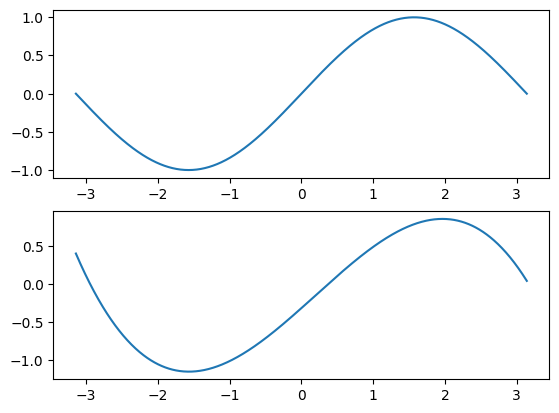

In [3]:
learnig_rate = 1e-6
for epoch in range(2000):
  y_pred = a*x**3 + b*x**2 + c*x +d
  loss = (y_pred - y).pow(2).sum().item()
  if epoch % 100 == 0:
    print(f"epoch:{epoch + 1} loss:{loss}")
  # 기울기의 미분값을 적용
  grad_y_pred = 2.0*(y_pred-y)
  grad_a = (grad_y_pred*x**3).sum()
  grad_b = (grad_y_pred*x**2).sum()
  grad_c = (grad_y_pred*x).sum()
  grad_d = grad_y_pred.sum()

  # 가중치 업데이트
  a-=learnig_rate*grad_a
  b-=learnig_rate*grad_b
  c-=learnig_rate*grad_c
  d-=learnig_rate*grad_d

# real sign
plt.subplot(2,1,1)
plt.plot(x,y)

# 학습후 예측한 값
plt.subplot(2,1,2)
plt.plot(x,y_pred)

14개의 요인을 분석해서 집값을 예측
  - MLP
  - 회귀
  - MSE

In [4]:
import sklearn
# sklearn.datasets.load_boston
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

학습순서
  - 모델정의 - 데이터불러오기 - 손실계산 -역전파(최적화) -원하는만큼 반복- 학습종료

In [5]:
len(data[0])  # 특성, 컬럼이 13개

13

In [6]:
torch.FloatTensor(target).view(-1,1)[:5]

tensor([[24.0000],
        [21.6000],
        [34.7000],
        [33.4000],
        [36.2000]])

In [7]:
import torch
import torch.nn as nn
from torch.optim.adam import Adam

In [8]:
batch_size = 100
lr = 1e-3
epochs = 300
model = nn.Sequential(
    nn.Linear(13, batch_size),
    nn.ReLU(),
    nn.Linear(batch_size , 1)
)
# 가중치 최적화 - 옵티마이져
optim = Adam(model.parameters(),lr = lr)

# 반복학습
for epoch in range(epochs):
  # 배치 반복
  for i in range(int(len(data) / batch_size)):
    start = i * batch_size
    end = start + batch_size

    # 실수형 텐서로 변환
    x = torch.FloatTensor(data[start:end])
    y = torch.FloatTensor(target[start:end]).view(-1,1)

    optim.zero_grad() # 가중치의 기울기를 0으로 초기화
    pred = model(x)
    loss = nn.MSELoss()(pred,y)
    loss.backward() # 오차 역전파
    optim.step()  # 최적화 진행
  if epoch % 20 ==0:
    print(f"epoch{epoch} loss:{loss.item()}")


epoch0 loss:138.53346252441406
epoch20 loss:19.88167953491211
epoch40 loss:17.073108673095703
epoch60 loss:15.673640251159668
epoch80 loss:14.653327941894531
epoch100 loss:14.070433616638184
epoch120 loss:13.890542984008789
epoch140 loss:13.944406509399414
epoch160 loss:13.992258071899414
epoch180 loss:13.884263038635254
epoch200 loss:13.2200345993042
epoch220 loss:12.810443878173828
epoch240 loss:13.657171249389648
epoch260 loss:13.525932312011719
epoch280 loss:13.381373405456543


성능평가

In [9]:
prediction = model(torch.FloatTensor( data[0]))
real = target[0]
prediction.item(), real.item()

(30.245407104492188, 24.0)

다중분류

단일출력, 다중출력

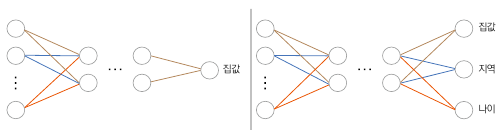

신경망에서는 회귀와 분류가... 거의 같다..
  - 출력을 그대로 사용하면 회귀
  - 출력을 확률분포로 바꿔주면 분류

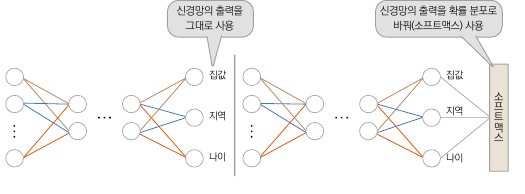

손글씨를 이용한 예측
  - 손실 : CE오차

In [10]:
from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

In [11]:
train_data = MNIST(root='./',train=True, download=True,transform=ToTensor())
test_data = MNIST(root='./',train=False, download=True,transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 220115899.66it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 109328243.52it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 81194352.90it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 17639378.49it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [12]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: ToTensor()

In [14]:
train_data.data.shape

torch.Size([60000, 28, 28])

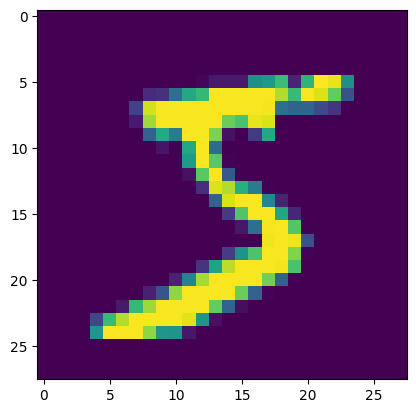

In [15]:
import matplotlib.pyplot as plt
plt.imshow(train_data.data[0])

배치단위로 데이터 가져오기
  - DataLoader

In [16]:
from torch.utils.data.dataloader import DataLoader
train_loader =  DataLoader(train_data,batch_size=32, shuffle=True)
test_loader =  DataLoader(test_data,batch_size=32, shuffle=False)

GPU셋팅

In [26]:
import torch
import torch.nn as nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [28]:
model = nn.Sequential(
    nn.Linear(28*28 , 64 ),
    nn.ReLU(),
    nn.Linear(64 , 64 ),
    nn.ReLU(),
    nn.Linear(64 , 10 )
)
model.to(device)  # 모델의 파라메터를 gpu로 전달

lr = 1e-3
optim = Adam(model.parameters(),lr=lr)

for epoch in range(20):
  for data,label in train_loader:
    optim.zero_grad()
    # 입력데이터를 모델의 입력에 맞게 변환
    data = data.view(-1,28*28).to(device)
    preds = model(data)
    # 손실계산
    loss = nn.CrossEntropyLoss()(preds, label.to(device))
    # 역전파
    loss.backward()
    # 최적화 진행
    optim.step()
  print(f"peoch{epoch+1} loss:{loss.item()}")

# 모델 저장(모델의 가중치를 dictionary형태로 저장)
torch.save(model.state_dict(),"MNIST.pth")


peoch1 loss:0.2195417582988739
peoch2 loss:0.09027203917503357
peoch3 loss:0.05474519729614258
peoch4 loss:0.05462007224559784
peoch5 loss:0.2553984224796295
peoch6 loss:0.05288313329219818
peoch7 loss:0.006453392095863819
peoch8 loss:0.040309906005859375
peoch9 loss:0.0847388282418251
peoch10 loss:0.14058582484722137
peoch11 loss:0.0003941604227293283
peoch12 loss:0.005471625365316868
peoch13 loss:0.018623720854520798
peoch14 loss:0.009418021887540817
peoch15 loss:0.0025590527802705765
peoch16 loss:0.0029854329768568277
peoch17 loss:0.0013666219310835004
peoch18 loss:5.0651273340918124e-05
peoch19 loss:0.002075936645269394
peoch20 loss:0.0005523065919987857


모델 성능평가

In [39]:
# 저장된 가중치로 모델 불러오기
model.load_state_dict(torch.load('./MNIST.pth',map_location=device))
num_corr = 0 # 분류에 성공한 전체 개수

# 가중치 없데이트 되면 안됨.. 평가이기때문에.
with torch.no_grad():
  for data, label in test_loader:
    data = data.view(-1,28*28).to(device)
    output = model(data)
    preds =  output.max(1)[1]
    corr = preds.eq(label.to(device)).sum().item()
    num_corr += corr
  print(f"Accuracy:{num_corr/len(test_data)}")


Accuracy:0.9755
